# Medical Insurance Cost prediction

This exercise is about performing some of the steps described in the notebook for the California Housing Data on another dataset for Medical Insurance Cost prediction.

# Get the Data

In [572]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

medical = pd.read_csv("https://bit.ly/44evDuW")

# Take a Quick Look at the Data Structure

In [573]:
# display the first 5 rows of the dataset by calling the head() function on medical

medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Each row represents one patient. 
There are 7 attributes.

The `info()` method is useful to get a quick description of the data, in
particular the total number of rows, each attribute’s type, and the number
of non-null values:

In [574]:
# get the number of rows, columns, and data types by using the info() method
medical.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [575]:
# show the number of patients in each region by using the value_counts() method on the "region" column
medical["region"].value_counts()


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Let’s look at the other fields. The describe() method shows a summary
of the numerical attributes.

In [576]:
# show descriptive statistics for the dataset by calling the describe() method on medical
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

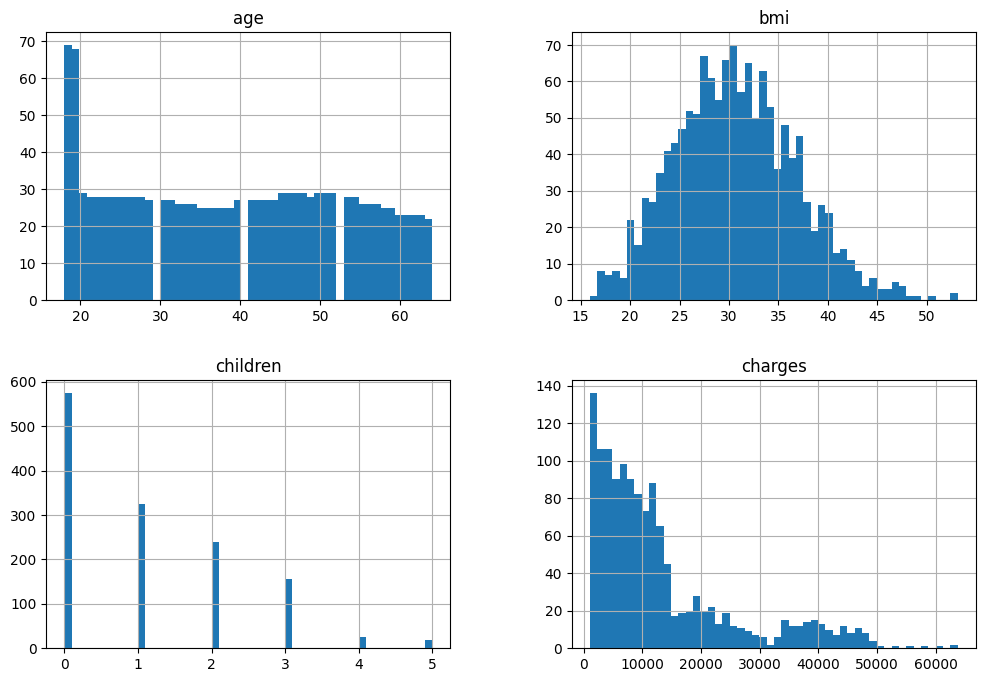

In [577]:
# show histograms for the numerical columns by using the hist() method on medical

#I changed the bins and figsize because it was hard to see

import matplotlib.pyplot as plt
medical.hist(bins=50, figsize=(12, 8))
#plt.show()


Briefly write here what you observe from these histograms.

an insurance charge of 60,000 is rare, while charges ranging in the 0-17,000 range are more common, maybe because people in the database are generally young. The bmi histogram makes an approxitametly normal curve, skewed slightly right which implies that the mean is greater than the median, which is approximately bmi = 30. This implies that people in the database are being estimated to be obease, but this many not necessairly be true if you take median into account. People in the database range from 15-66? And have 0-4 children, with most having 0 children. (probably becuase most people in the database are children themselves).

## Create a Test Set

In [578]:
# use train_test_split() to split the data into training and test sets
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(medical, test_size=0.2, random_state=42)
#len(train_set), len(test_set)


# Explore and Visualize the Data to Gain Insights

So far you have only taken a quick glance at the data to get a general
understanding of the kind of data you are manipulating. Now the goal is to
go into a little more depth.

First, make sure you have put the test set aside and you are only
exploring the training set.

In [579]:
# make a copy of the train set and save it to a variable called medical
medical = train_set.copy()


array([[<Axes: title={'center': 'charges'}>]], dtype=object)

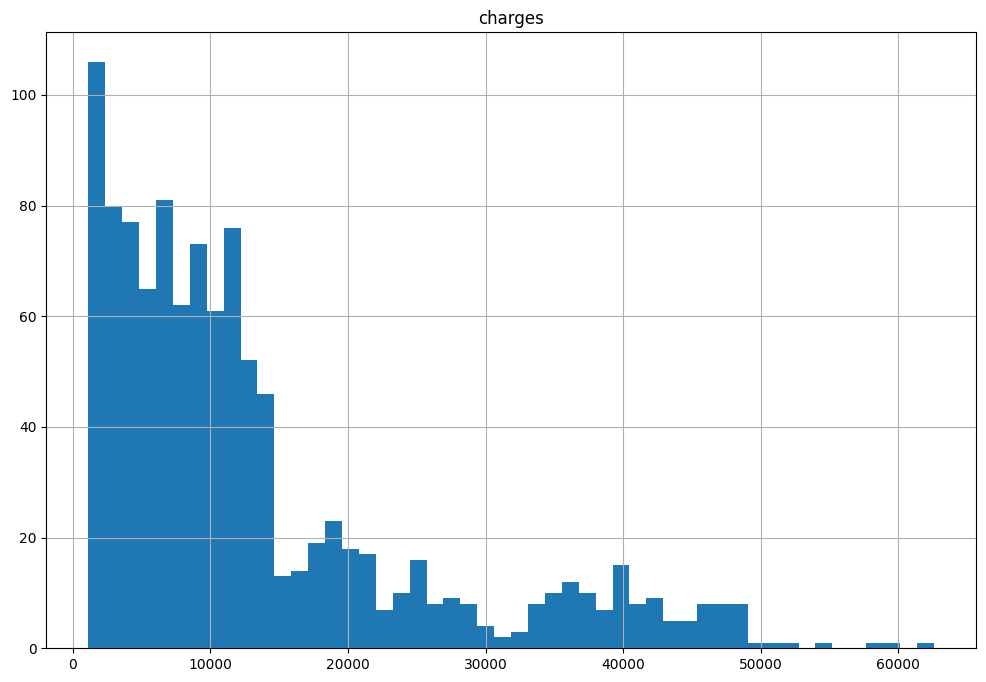

In [580]:
# build a histogram of the charges column
medical.hist(['charges'],bins=50, figsize=(12, 8))

This distribution is right-skewed. To make it closer to normal we can apply natural log

<Axes: >

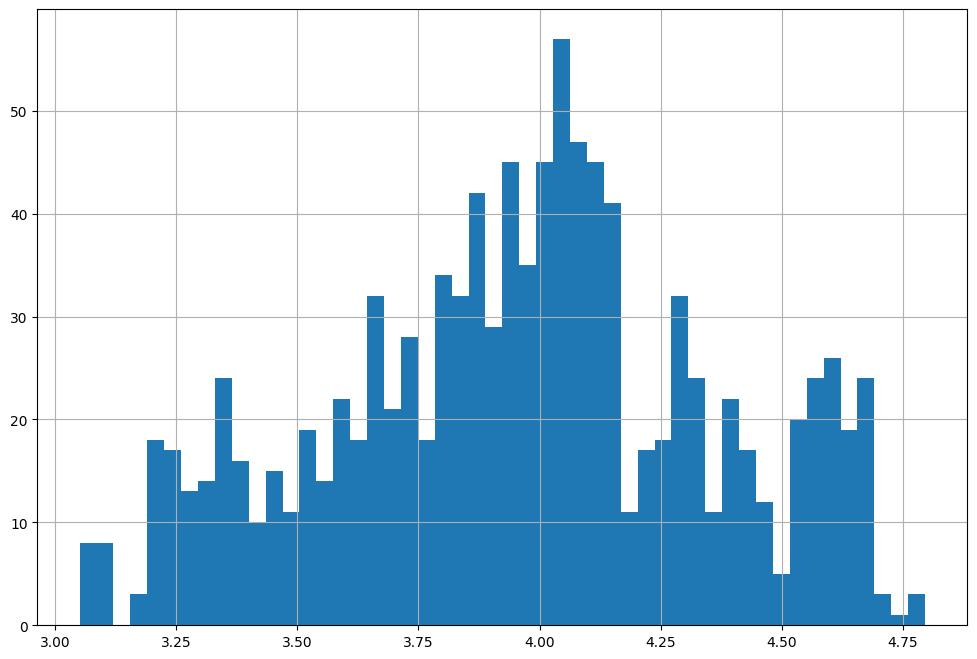

In [581]:
# apply a log transformation to the charges column using the np.log10() function
# build a histogram of the transformed column
import numpy as np


log_transformed = np.log10(medical['charges'])
log_transformed.hist(bins=50, figsize=(12, 8))




Now let's look at the mean charges by region

southeast total =  14698.242993074204
southwest total =  12611.500972651515
northwest total =  12622.514245976563
northeast total =  13484.520254242425
southwest    12611.500973
northwest    12622.514246
northeast    13333.008791
southeast    14698.242993
dtype: float64


<Axes: >

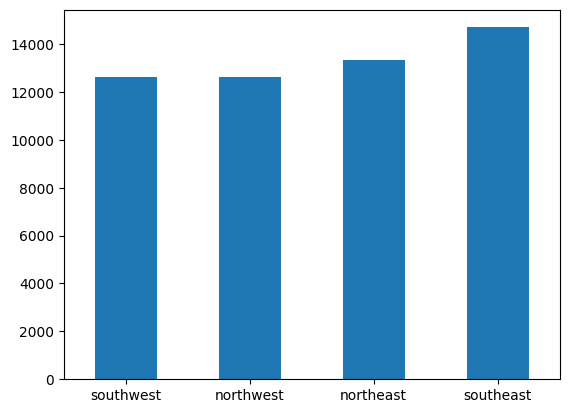

In [582]:
# compute the average insurance cost for each region
# sort the charges_by_region Series from the lowest to highest cost
# plot the sorted Series using the plot.bar() method

region_charges=medical[['region','charges']].sort_values('region')
total_patients_by_region = medical["region"].value_counts()

southeast_total = total_patients_by_region["southeast"]
southeast = region_charges[region_charges["region"] == 'southeast']
sesum = southeast['charges'].sum()
print("southeast total = " , sesum/southeast_total)

southwest = region_charges[region_charges["region"] == 'soutwest']
southwest_total = total_patients_by_region["southwest"]
southwest = region_charges[region_charges["region"] == 'southwest']
swsum = southwest['charges'].sum()
print("southwest total = " , swsum/southwest_total)


northwest = region_charges[region_charges["region"] == 'northwest']
northwest_total = total_patients_by_region["northwest"]
northwest = region_charges[region_charges["region"] == 'northwest']
nwsum = northwest['charges'].sum()
print("northwest total = " , nwsum/northwest_total)


northeast = region_charges[region_charges["region"] == 'northeast']
northeast_total = total_patients_by_region["northeast"]
northeast = region_charges[region_charges["region"] == 'northeast']
nesum = northeast['charges'].sum()
print("northeast total = " , nesum/southwest_total)

d = {'southeast':sesum/southeast_total, 'southwest':swsum/southwest_total, 'northwest':nwsum/northwest_total, 'northeast':nesum/northeast_total}
charges_by_region = pd.Series(data=d,index=['southeast','southwest','northeast','northwest']).sort_values()

print(charges_by_region)

charges_by_region.plot.bar(rot=0)




Overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region.

Now, create three grouped barcharts for average charges by region grouped by sex, smoking, and number of children. 

### How to create grouped barcharts?

Creating grouped bar charts with Seaborn is a bit more intuitive compared to Matplotlib. 
You can use the catplot function with kind='bar' to create grouped bar charts. Here is an example on the tips datasets that comes with Seaborn. 
The tips dataset contains information about the total bill and tip amount for different meals, along with additional information such as the sex of the individual paying for the meal, whether they are a smoker, the day and time of the meal, and the size of the party.

We will create a grouped bar chart showing the average total bill for each day, grouped by whether the meal took place at lunch or dinner. 



```
import seaborn as sns
import matplotlib.pyplot as plt

# Load the 'tips' dataset
tips = sns.load_dataset("tips")

# Create a grouped bar chart
sns.catplot(data=tips, x="day", y="total_bill", hue="time", kind="bar")

plt.show()
```
In this plot, the height of the bars represents the average total bill for meals on each day, with separate bars for lunch and dinner. 

The `catplot` function is a flexible function that can create a variety of different plot types. By setting `kind='bar'`, we specify that we want a bar chart. The x and y arguments specify the data for the x and y axes, and the `hue` argument specifies a third variable that is used to group the data.

In the context of Seaborn and many other statistical visualization libraries, error bars commonly represent one standard deviation or standard error of the mean.

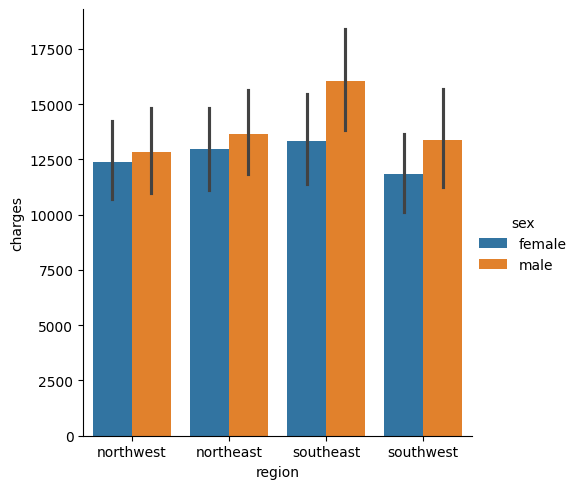

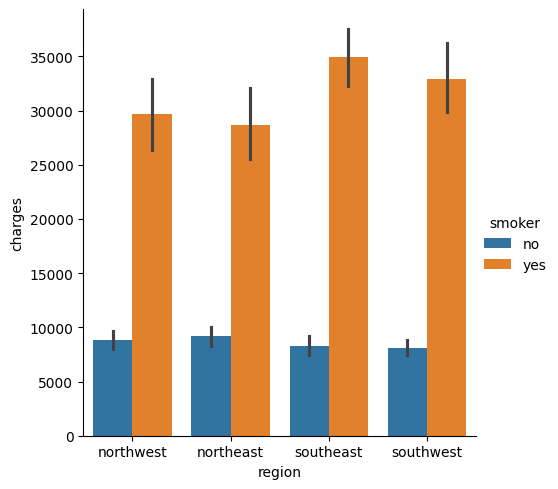

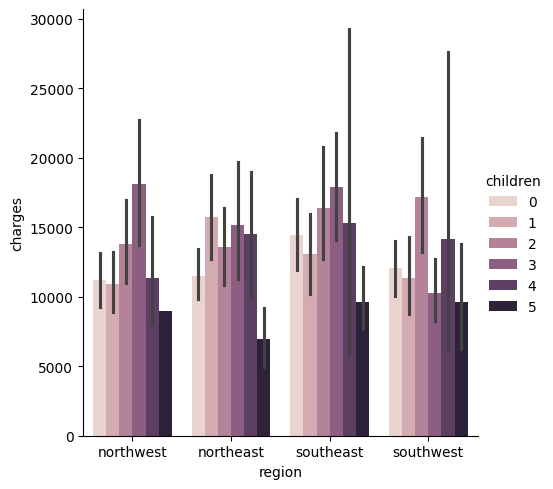

In [583]:
# plot grouped bar charts of region and insurance costs hue by sex, smoker, and number of children (three separate charts)
# use the catplot() function to create the bar charts
# set the kind parameter to "bar" and the data parameter to medical

import seaborn as sns
import matplotlib.pyplot as plt

#medical = sns.load_dataset('medical')
sns.catplot(data=medical, kind='bar', x='region', y='charges', hue='sex')
sns.catplot(data=medical, kind='bar', x='region', y='charges', hue='smoker')
sns.catplot(data=medical, kind='bar', x='region', y='charges', hue='children')

plt.show()

**What do you observe?** Briefly write what you observe from the charts. 


I notice males tend to have higher insurance charges than females in every region, which might point to the fact that males are more likely take risks and get injured. This would be consistent, but google searches tend to suggest that females actually pay more. Smokers pay an astounding amount in medical charges in every region because well, smoking causes a plethora of health issues. Having 5 children is actually cheaper than having 0-4, maybe because there are subsidies in place to help large families?


Now let's analyze the medical charges by age, bmi and children according to the smoking factor.

      age     sex     bmi  children smoker     region      charges
560    46  female  19.950         2     no  northwest   9193.83850
1285   47  female  24.320         0     no  northeast   8534.67180
1142   52  female  24.860         0     no  southeast  27117.99378
969    39  female  34.320         5     no  southeast   8596.82780
486    54  female  21.470         3     no  northwest  12475.35130
...   ...     ...     ...       ...    ...        ...          ...
1095   18  female  31.350         4     no  northeast   4561.18850
1130   39  female  23.870         5     no  southeast   8582.30230
1294   58    male  25.175         0     no  northeast  11931.12525
860    37  female  47.600         2    yes  southwest  46113.51100
1126   55    male  29.900         0     no  southwest  10214.63600

[1070 rows x 7 columns]


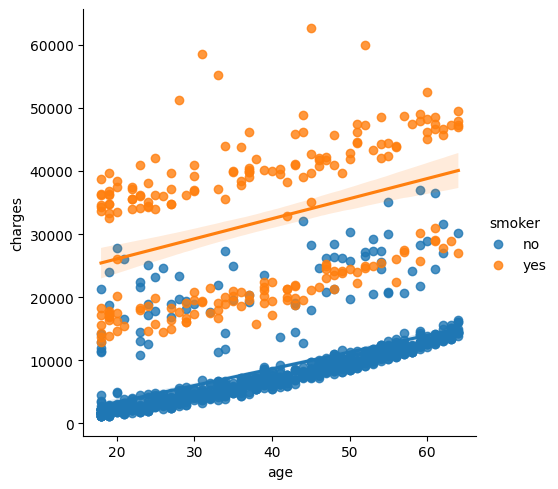

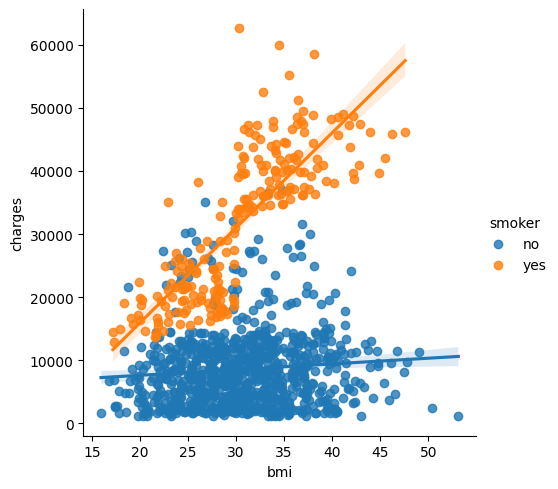

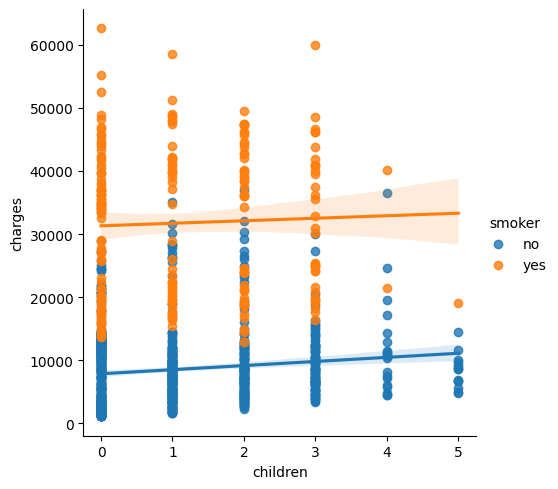

In [584]:
import seaborn as sns
# using the lmplot() function of seaborn, build a scatter plot of age and insurance costs, hue by smoker
# build a second scatter plot of bmi and insurance costs, hue by smoker
# build a third scatter plot of children and insurance costs, hue by smoker

print(medical)

a = sns.lmplot(data=medical, x='age', y='charges', hue='smoker')
plt.show()
b = sns.lmplot(data=medical, x='bmi', y='charges', hue='smoker')
plt.show()
c = sns.lmplot(data=medical, x='children', y='charges', hue='smoker')
plt.show()




Describe in a one-liner what you obeserve from the charts.

smoking is certainly bad, and smoking paired with obeasity increases medical charges almost linearly, smoking paired with children also increases charges.

### Look for Correlations

In [585]:
#compute pairwise correlation of columns using the corr() method
correlation_matrix = medical.corr(numeric_only=True)

correlation_matrix



,age,bmi,children,charges
age,1.000000,0.118274,0.060999,0.281721
bmi,0.118274,1.000000,-0.005040,0.197316
children,0.060999,-0.005040,1.000000,0.071885
charges,0.281721,0.197316,0.071885,1.000000


The correlation coefficient ranges from –1 to 1. When it is close to 1, it
means that there is a strong positive correlation. 
Finally, coefficients close to 0 mean that there is no linear correlation.

Another way to check for correlation between attributes is to use the
Pandas `scatter_matrix()` function, which plots every numerical
attribute against every other numerical attribute.

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>,
        <Axes: xlabel='charges', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>,
        <Axes: xlabel='charges', ylabel='bmi'>],
       [<Axes: xlabel='age', ylabel='children'>,
        <Axes: xlabel='bmi', ylabel='children'>,
        <Axes: xlabel='children', ylabel='children'>,
        <Axes: xlabel='charges', ylabel='children'>],
       [<Axes: xlabel='age', ylabel='charges'>,
        <Axes: xlabel='bmi', ylabel='charges'>,
        <Axes: xlabel='children', ylabel='charges'>,
        <Axes: xlabel='charges', ylabel='charges'>]], dtype=object)

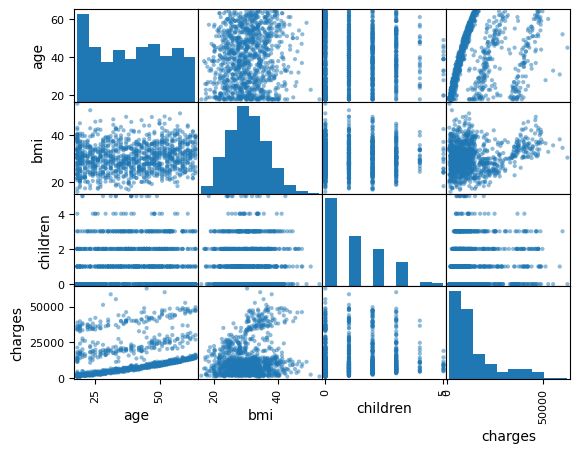

In [586]:
# plot correlation matrix using scatter_matrix() function from pandas.plotting
import pandas as pd
pd.plotting.scatter_matrix(medical)


The main diagonal would be full of straight lines if Pandas plotted each
variable against itself, which would not be very useful. So instead, the
Pandas displays a histogram of each attribute.

Looking at the correlation scatterplots, it seems like the most promising
attribute to predict the charge value is bmi, so let's
zoom in on their scatterplot.

<Axes: xlabel='bmi', ylabel='charges'>

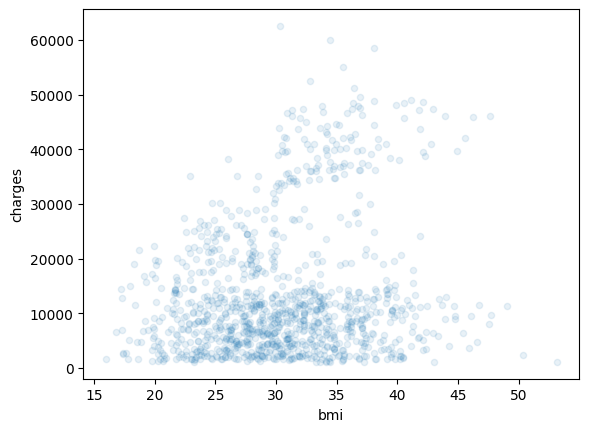

In [587]:
# plot a scatter plot of bmi vs. insurance costs using the medical.plot() method, use the alpha parameter to set the opacity of the points to 0.1

medical.plot(kind='scatter',x='bmi',y='charges', alpha=0.1)

The correlation is somewhat visible; you can clearly see the upward trend.

# Prepare the data for ML

In [588]:
# drop the charges column from the train_set and save the resulting dataset to a variable called `medical`
# create a copy of the train_set labels and save it to a variable called `medical_labels`
# replace None with the correct code


medical = train_set.drop('charges',axis=1) #axis=1 drops column
medical_labels = train_set['charges'].copy()



# Transformation Pipelines

As you can see, there are many data transformation steps that need to be
executed in the right order. Fortunately, Scikit-Learn provides the
Pipeline class to help with such sequences of transformations.

In [589]:
# uncomment the following code to create a pipeline for preprocessing the data

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

num_attribs = ["age", "bmi", "children"]
cat_attribs = ["sex", "smoker", "region"]

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),   #fill missing vals with median
    StandardScaler())               #standardize; compute z-score

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))  #represent categorical vars as numerical values

preprocessing = ColumnTransformer([     #applying data transformers to different columns in dataset
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)])

medical_prepared = preprocessing.fit_transform(medical) #idk but basicaalyu apply pipeline

print(medical_prepared.shape)
print(preprocessing.get_feature_names_out())

(1070, 11)
['num__age' 'num__bmi' 'num__children' 'cat__sex_female' 'cat__sex_male'
 'cat__smoker_no' 'cat__smoker_yes' 'cat__region_northeast'
 'cat__region_northwest' 'cat__region_southeast' 'cat__region_southwest']


# Select and Train a Model

At last! You framed the problem, you got the data and explored it, you
sampled a training set and a test set, and you wrote a preprocessing
pipeline to automatically clean up and prepare your data for machine
learning algorithms. You are now ready to select and train a machine
learning model.

## Train and Evaluate on the Training Set

The good news is that thanks to all these previous steps, things are now
going to be easy! You decide to train a very basic linear regression model
to get started:

In [590]:
# create a pipeline for preprocessing the data and fitting a linear regression model
# lin_reg = ...

# housing_labels is the column we want to predict
# uncomment the following line to fit the model

# lin_reg.fit(medical, medical_labels)

from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(medical, medical_labels)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linearregression', LinearRegression())])

Try out the model on the training set, look at the first five predictions and compare them to
the labels:

In [591]:
# uncomment the following line to make predictions

medical_predictions = lin_reg.predict(medical)
medical_predictions

array([ 7094.54007011,  8344.72998713,  9153.77419778, ...,
       11441.08519155, 37314.37460682, 11453.12102783])

In [592]:
# uncomment the following lines to compute the RMSE

from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(medical_labels, medical_predictions, squared=False)
lin_rmse

c:\Users\naumh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


6105.545160099847

Now try `DecisionTreeRegressor`, as this is a fairly powerful
model capable of finding complex nonlinear relationships in the data
(decision trees are covered later in the course):

In [593]:
# use DecisionTreeRegressor to train the model
# use the make_pipeline() function to create a pipeline for preprocessing and model training
# use the preprocessing object you created earlier
# make predictions on the training set and compute the RMSE

from sklearn.tree import DecisionTreeRegressor   #still unsure about what this does

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor())

tree_reg.fit(medical, medical_labels)

medical_predictions = tree_reg.predict(medical)
tree_rsme = mean_squared_error(medical_labels, medical_predictions,squared=False)
tree_rsme










c:\Users\naumh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


494.20598375812835

# Better Evaluation Using Cross-Validation

The following code randomly splits the training set into 10 nonoverlapping
subsets called folds, then it trains and evaluates the decision tree model
10 times, picking a different fold for evaluation every time and using the
other 9 folds for training. The result is an array containing the 10
evaluation scores:

In [594]:
# uncomment the following lines to train the model and make predictions

from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, 
                              medical,medical_labels,
                              scoring="neg_root_mean_squared_error", 
                              cv=10)
tree_rmses

array([6319.56347264, 6708.44435978, 6412.87171148, 6718.5592829 ,
       7098.7921269 , 6154.25490847, 7634.9457189 , 7226.03064722,
       7176.75079223, 5206.11673843])

**Warning**. Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the RMSE. It’s a negative value, so you need to switch the sign of the output to get the RMSE scores.

In [595]:
# uncomment the following line to compute the mean of the RMSEs

np.mean(tree_rmses)

6665.63297589507

Let’s try one last model now: the RandomForestRegressor. As you will
see later in the course, random forests work by training many decision trees on
random subsets of the features, then averaging out their predictions.

In [596]:
# use RandomForestRegressor to train the model
# use the make_pipeline() function to create a pipeline for preprocessing and model training
# use the preprocessing object you created earlier
# make predictions on the training set and compute the RMSEs using cross-validation
# compute the mean of the RMSEs


from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,RandomForestRegressor())  #pipeline for preprocessing and model training

forest_reg.fit(medical, medical_labels)

medical_predictions = forest_reg.predict(medical)


forest_rmses = -cross_val_score(tree_reg, 
                             medical,medical_labels,
                             scoring="neg_root_mean_squared_error", 
                             cv=10)
np.mean(forest_rmses)





6688.988418530002

# Fine-Tune Your Model

Let’s assume that you now have a shortlist of promising models. You now
need to fine-tune them.


## Randomized Search for Good Hyperparameters


In [597]:
# uncomment the following lines to search for the best hyperparameters

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([("preprocessing", preprocessing),
                          ("random_forest", RandomForestRegressor(random_state=42)),
                          ])

param_distribs = {'random_forest__max_features': randint(low=2,high=20)}

rnd_search = RandomizedSearchCV(full_pipeline, 
                                param_distributions=param_distribs,
                                n_iter=10, 
                                cv=3,
                                scoring='neg_root_mean_squared_error', 
                                random_state=42)

rnd_search.fit(medical, medical_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'bmi',
                                                                                'children']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['sex',
                                                                                'smoker',
                                                                                'region'])])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C52DA6D040>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [598]:
# uncomment the following lines to print the best search scores

rn_res = pd.DataFrame(rnd_search.cv_results_)
rn_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
rn_res.head(5)["mean_test_score"]

7   -4810.698561
9   -4861.373750
0   -4912.976290
4   -4912.976290
3   -4976.129581
Name: mean_test_score, dtype: float64

In [599]:
# uncomment the following lines to print the feature importances

final_model = rnd_search.best_estimator_ # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
final_model
feature_importances

array([0.14032922, 0.18831699, 0.0230048 , 0.00493845, 0.00454404,
       0.28737838, 0.33010198, 0.00580561, 0.00521445, 0.00654471,
       0.00382136])

In [600]:
# uncomment the following line to print the feature importances with the feature names

sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()),reverse=True)

[(0.3301019845385152, 'cat__smoker_yes'),
 (0.2873783836848969, 'cat__smoker_no'),
 (0.18831699212058217, 'num__bmi'),
 (0.1403292169242826, 'num__age'),
 (0.023004795671815754, 'num__children'),
 (0.006544713122635331, 'cat__region_southeast'),
 (0.005805609883995696, 'cat__region_northeast'),
 (0.0052144512790023795, 'cat__region_northwest'),
 (0.0049384524581677835, 'cat__sex_female'),
 (0.004544038586538503, 'cat__sex_male'),
 (0.003821361729567661, 'cat__region_southwest')]

In [601]:
#now that you have a final model, evaluate it on the test set (find rmse)

#medical = train_set.drop('charges',axis=1) #axis=1 drops column
#medical_labels = train_set['charges'].copy()

ft = test_set.drop('charges',axis=1)
ft_labels = test_set['charges'].copy()

ft_rmses = -cross_val_score(final_model,
                            ft, ft_labels,
                            scoring="neg_root_mean_squared_error",
                            cv=10)

ft_rmses

np.mean(ft_rmses)


#tree_rmses = -cross_val_score(tree_reg, 
#                              ft, f_labels 
#                              scoring="neg_root_mean_squared_error", 
#                              cv=10)
#tree_rmses



4692.401642760105